In [11]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

In [3]:
df_cleaned = pd.read_csv('../data/remove_removed.csv')
df_title_selftext = pd.read_csv('../data/concat_title_selftext.csv')

df_title = df_cleaned[['title', 'subreddit']]
df_selftext = df_cleaned[['selftext', 'subreddit']]

X = df_title['title']
y = df_title['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### First Random Forrest model on just titles (best model from logistic regression)

In [26]:
params = {
    'cv__stop_words': ['english'],
    'cv__ngram_range' : [(1,2)],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 3, 5, 7],
    'rf__min_samples_split': [2, 3, 5],
    'rf__random_state' : [1]
}

In [27]:
rf_pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier())
     ])

In [28]:
gs = GridSearchCV(
    rf_pipe,
    param_grid=params,
    n_jobs=-1
)

In [29]:
gs.fit(X_train, y_train)

gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9905460878218684, 0.8134328358208955)

In [30]:
gs.best_estimator_

Pipeline(steps=[('cv',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('rf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=150,
                                        random_state=1))])

In [31]:
print(recall_score(y_test, gs.predict(X_test), pos_label = 0))
print(precision_score(y_test, gs.predict(X_test), pos_label = 0))
print(f1_score(y_test, gs.predict(X_test), pos_label = 0))

0.900327868852459
0.7977919814061593
0.8459642637091805


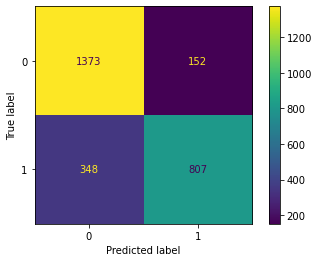

In [32]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test)